<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives

In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html")

Scrape the `Language name` and `annual average salary`.


In [5]:
tbody = soup.tbody
trs = tbody.contents

In [6]:
trs[:4]

['\n',
 <tr>
 <td>No.</td>
 <td>Language</td>
 <td>Created By</td>
 <td>Average Annual Salary</td>
 <td>Learning Difficulty</td>
 </tr>,
 '\n',
 <tr>
 <td>1</td>
 <td>Python</td>
 <td>Guido van Rossum</td>
 <td>$114,383</td>
 <td>Easy</td>
 </tr>]

In [12]:
# 'tr' starts with each 'tr' separted by '\n' (all '\n' are even number index list)
trs_even_list =[]
for i in range(0, len(trs[2:]), 2):  # select only even number indexes 
    trs_even_list.append(trs[i])
print(trs_even_list)

['\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n']


In [7]:
#your code goes here

tbody = soup.tbody
trs = tbody.contents

programming_language  = []
average_salary  = []
for i in range(1, len(trs[2:]), 2):
    language_name = trs[2:][i].find_all('td')[1].text  #Language names are in the first index of the 'td' list
    salary = trs[2:][i].find_all('td')[3].text  #Salaries values are in the third index of the 'td' list
    
    programming_language.append(language_name)
    
    average_salary.append(salary)
    
print(programming_language, average_salary)

['Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go'] ['$114,383', '$101,013', '$92,037', '$110,981', '$130,801', '$113,865', '$88,726', '$84,727', '$84,793', '$94,082']


In [8]:
# create an empyty dataframe df_data
df = pd.DataFrame()

# assign 'Average Annual Salary' and 'Language' columns using programming_language, average_salary from above 
df['Language'] = programming_language
df['Average Annual Salary'] = average_salary

df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


## Save the scrapped data into a file named *popular-languages.csv*

In [9]:
df.to_csv('popular-languages.csv', index=None)

## Sorting the dataframe by 'Average Annual Salary' column

In [10]:
df.sort_values(by= 'Average Annual Salary', ascending=True)

,Language,Average Annual Salary
1,Java,"$101,013"
3,Javascript,"$110,981"
5,C++,"$113,865"
0,Python,"$114,383"
4,Swift,"$130,801"
7,PHP,"$84,727"
8,SQL,"$84,793"
6,C#,"$88,726"
2,R,"$92,037"
9,Go,"$94,082"


### Sorting above did not working properly because of $ sign in 'Average Annual Salary' column

In [11]:
# Remove $ from Average Annual Salary column
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')

C:\Users\Dad\AppData\Local\Temp\ipykernel_1584\806034066.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')


## Try again

In [15]:
df.sort_values(by= 'Average Annual Salary', ascending=True)

,Language,Average Annual Salary
1,Java,"101,013"
3,Javascript,"110,981"
5,C++,"113,865"
0,Python,"114,383"
4,Swift,"130,801"
7,PHP,"84,727"
8,SQL,"84,793"
6,C#,"88,726"
2,R,"92,037"
9,Go,"94,082"


In [16]:
df.dtypes

Language                 object
Average Annual Salary    object
dtype: object

## Sort_values() still not working because Average Annual Salary column is object/string

In [17]:
# convert "Average Annual Salary" column to a number 
df['Average Annual Salary'] = pd.to_numeric(df['Average Annual Salary'])

ValueError: Unable to parse string "114,383" at position 0

## Values in 'Average Annual Salary' column are separated by a coma (Python 114,383)  

In [18]:
# replace 'Average Annual Salary' column commas with blanks
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',','')

# Now we can change the datatype 

In [19]:
# convert column "Average Annual Salary" of a DataFrame
## alternatively we can use .astype('float') df['Average Annual Salary'] = df['Average Annual Salary'].astype('int')
df['Average Annual Salary'] = pd.to_numeric(df['Average Annual Salary'])

## Check the datatype of df columns 

In [20]:
df.dtypes

Language                 object
Average Annual Salary     int64
dtype: object

## Now we can sort the DataFramne ascending by 'Average Annual Salary' column 

In [25]:
df_plot = df.sort_values(by= 'Average Annual Salary', ascending=True)
df_plot

,Language,Average Annual Salary
7,PHP,84727
8,SQL,84793
6,C#,88726
2,R,92037
9,Go,94082
1,Java,101013
3,Javascript,110981
5,C++,113865
0,Python,114383
4,Swift,130801


In [26]:
df_plot.columns

Index(['Language', 'Average Annual Salary'], dtype='object')

### Alternatively the above can be done in one line of code

### Plot bar chart in the descending order of salary.


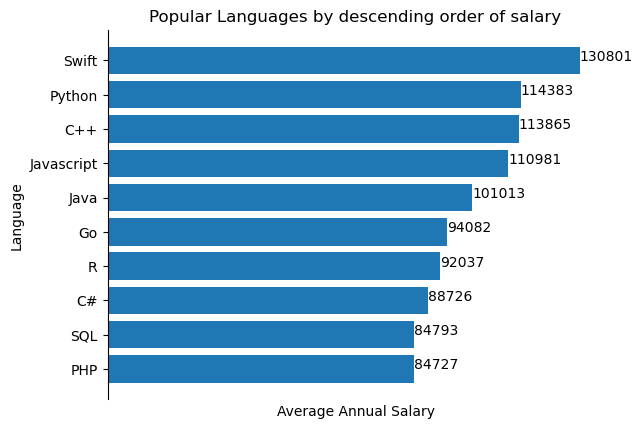

<Figure size 600x1200 with 0 Axes>

In [78]:
# Assign x & y 
x = df_plot['Language']
y = df_plot['Average Annual Salary']

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

#Plot bar chart
plt.barh(x, y)

# display the value on each bar 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# giving title to the plot
plt.title('Popular Languages by descending order of salary')
     
# giving X and Y labels
plt.ylabel('Language')
plt.xlabel('Average Annual Salary')

# remove x axis ticks to tidy the chart 
plt.xticks([])

plt.figure(figsize=(6,12))

  
plt.show();



In [75]:
type(ax)

matplotlib.axes._axes.Axes

In [76]:
ax.spines